In [7]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
pip install scikit-image imutils opencv-python pillow

In [ ]:
#!mkdir pan_card_tampering
#!mkdir pan_card_tampering/image

In [10]:
from skimage.io import imread,imshow

In [12]:
orignal = imread('orignal.png')

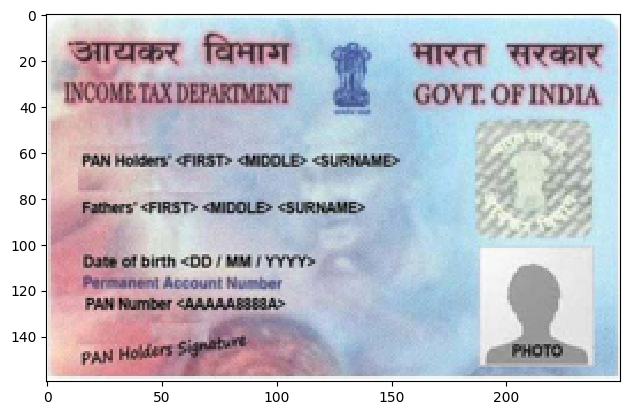

In [14]:
imshow(orignal)

In [16]:
tempared = imread('tempared.png')

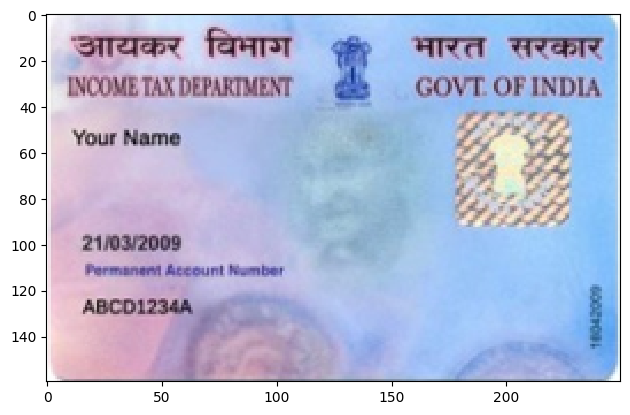

In [17]:
imshow(tempared)

In [19]:
original_gray = cv2.cvtColor(orignal, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tempared, cv2.COLOR_BGR2GRAY)

In [20]:
# Computing SS Index (SSIM) between the Original and Tampered images
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3210803177184475


In [21]:
diff

array([[219, 211, 196, ...,  77,  75,  81],
       [219, 219, 210, ..., 108, 107,  98],
       [222, 225, 223, ..., 140, 137, 128],
       ...,
       [191, 206, 205, ..., 168, 172, 181],
       [181, 197, 186, ..., 146, 156, 171],
       [156, 186, 177, ..., 134, 141, 143]], dtype=uint8)

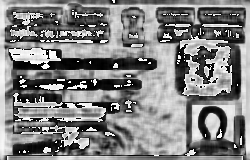

In [22]:
Image.fromarray(diff)

In [23]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [25]:
# Loop over the Contours
for c in cnts:
  # applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(orignal, (x,y), (x+w, y+h), (0, 0, 255), 2)
  cv2.rectangle(tempared, (x,y), (x+w, y+h), (0, 0, 255), 2)

Orignal Image


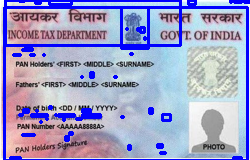

In [27]:
# Display the Images with Contours
print("Orignal Image")
Image.fromarray(orignal)

Tempared Image


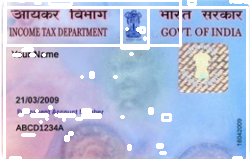

In [28]:
print("Tempared Image")
Image.fromarray(tempared)

Difference bw the 2 Images


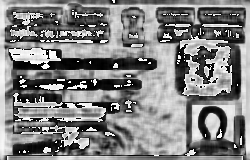

In [29]:
print("Difference bw the 2 Images")
Image.fromarray(diff)

Threshold Image


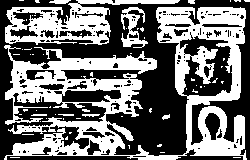

In [30]:
# Displaying the Threshold Image with White portion
print("Threshold Image")
Image.fromarray(thresh)